<html>
<head>
<style>
    body {
        font-family: 'Arial', sans-serif;
        margin-left: 40px;
        background: #ECE9E6;  /* Color de fondo general */
        background: -webkit-linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado para Chrome */
        background: linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado estándar */
    }
    .header {
        color: #2E86C1; /* Azul oscuro */
        padding-bottom: 10px;
        font-size: 32px;
        font-weight: bold;
        border-bottom: 3px solid #2E86C1; /* Borde con el mismo color para consistencia */
    }
    .subheader {
        color: #3498DB; /* Azul un poco más claro */
        padding-top: 5px;
        font-size: 24px;
    }
    .description {
        color: #5DADE2; /* Azul aún más claro para el cuerpo de texto */
        padding: 20px 0;
        font-size: 16px;
        text-align: left;
    }
    .footer {
        color: #AED6F1; /* Azul muy claro para la fecha */
        font-size: 14px;
        padding-top: 30px;
    }
</style>
</head>
<body>

<div class="header">
    Series de Tiempo (Predicción y Caos)
</div>

<div class="subheader">
    Alumno: Rodrigo Gerardo Trejo Arriaga
</div>

<div class="description">
    <strong>Título de la Práctica:</strong> A Determinar
    <br><br>
    Este trabajo se centra en el análisis y comprensión de las series de tiempo desde una perspectiva de predicción y caos. Se abordan métodos estadísticos y algoritmos predictivos para descubrir la estructura subyacente dentro de los datos dinámicos.
</div>

<div class="footer">
    Fecha de Entrega: <strong>24 de Febrero, 2024</strong>
</div>

</body>
</html>


In [256]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gamma, gmean, mode, norm
from scipy.optimize import minimize
from scipy.special import gammaln, psi


In [257]:
def plotear_hist(array: np.ndarray, titulo: str, label_x: str, label_y: str, ruta_img: str, criterio: str = 'sturges') -> None:
    """
    Genera y guarda un histograma con estilos personalizados, colores aleatorios para cada barra,
    y el número de bins determinado por el criterio especificado.

    Args:
        array (np.ndarray): Array de Numpy con los datos que se quieren plasmar en el histograma.
        titulo (str): Título del histograma.
        label_x (str): Etiqueta del eje x del histograma.
        label_y (str): Etiqueta del eje y del histograma.
        ruta_img (str): Ruta donde se guardará la imagen del histograma.
        criterio (str): Método para calcular el número de bins ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice').

    Returns:
        None: La función no retorna nada.
    """
    plt.style.use('dark_background')
    
    match criterio:
        case 'sturges':
            bins = int(1 + np.log2(len(array)))
        case 'freedman-diaconis':
            iqr = np.subtract(*np.percentile(array, [75, 25]))
            bin_width = 2 * iqr * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'scott':
            bin_width = 3.5 * np.std(array) * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'raiz_cuadrada':
            bins = int(np.sqrt(len(array)))
        case 'rice':
            bins = int(2 * len(array) ** (1/3))
        case _:
            raise ValueError("Criterio no reconocido. Usa 'sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', o 'rice'.")

    n, bins, patches = plt.hist(array, bins=bins, alpha=0.75, rwidth=0.85)

    for patch in patches:
        plt.setp(patch, 'facecolor', np.random.rand(3,))
        
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title(titulo, fontsize=20, fontweight='bold', color=np.random.rand(3,))
    plt.xlabel(label_x, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylabel(label_y, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylim(0, max(n)*1.1)
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    plt.show()


In [258]:
def escribir_array(ruta_arch:str, array: np.ndarray):
    """
    Escribe los elementos de un array de Numpy en un archivo de texto, separados por comas.

    Args:
        ruta_arch (str): La ruta del archivo donde se desea guardar el array.
        array (np.ndarray): El array de Numpy que se desea escribir en el archivo.

    Returns:
        None: La función no retorna nada.
    """
    with open(ruta_arch, "w") as archivo:
        archivo.write(",".join(map(str, array)))

In [259]:
def cargar_set(archivo):
    with open(archivo, 'r') as file:
        contenido = file.read()
    numeros_str = contenido.split(',')
    numeros_enteros = [float(numero) for numero in numeros_str]
    return numeros_enteros

In [260]:
import numpy as np
from scipy.stats import gmean, skew, kurtosis
from scipy import stats

class DistribucionProbabilidad:
    def __init__(self, datos):
        self.datos = np.array(datos)
        self.n = len(datos)
    
    def media(self):
        return np.mean(self.datos)
    
    def mediana(self):
        return np.median(self.datos)
    
    def moda(self):
        mode_res = stats.mode(self.datos)
        if np.isscalar(mode_res.count):
            return mode_res.mode
        else:
            return mode_res.mode if mode_res.count[0] > 1 else mode_res.mode[0]
    
    def media_geometrica(self):
        return gmean(self.datos)
    
    def asimetria(self):
        return skew(self.datos)
    
    def rango(self):
        return np.max(self.datos) - np.min(self.datos)
    
    def desviacion_estandar(self):
        return np.std(self.datos, ddof=1)
    
    def varianza(self):
        return np.var(self.datos, ddof=1)
    
    def coeficiente_variacion(self):
        return self.desviacion_estandar() / self.media()
    
    def percentil(self, p):
        if 0 <= p <= 100:
            return np.percentile(self.datos, p)
        else:
            raise ValueError("El percentil debe estar entre 0 y 100.")
    
    def cuartil(self, q):
        if q in [1, 2, 3]:
            return self.percentil(q * 25)
        else:
            return np.nan
    
    def curtosis(self):
        return kurtosis(self.datos)
    
    def entropia(self):
        p, counts = np.unique(self.datos, return_counts=True)
        p = counts / len(self.datos)
        return -np.sum(p * np.log(p))
    
    def calcular_metricas(self, percentil, cuartil):
        resultados = {
            'Media': self.media(),
            'Mediana': self.mediana(),
            'Moda': self.moda(),
            'Media Geométrica': self.media_geometrica(),
            'Rango': self.rango(),
            'Desviación Estándar': self.desviacion_estandar(),
            'Varianza': self.varianza(),
            f'Percentil {percentil}': self.percentil(percentil),
            f'Cuartil {cuartil}': self.cuartil(cuartil),
            'Asimetría': self.asimetria(),
            'Coeficiente de Variación': self.coeficiente_variacion(),
            'Curtosis': self.curtosis(),
            'Entropía': self.entropia()
        }
        
        for metrica, valor in resultados.items():
            print(f"{metrica}: {valor}")


In [261]:
class DistribucionUniforme(DistribucionProbabilidad):
    
    def __init__(self, datos):
        super().__init__(datos)
        self.a = min(datos)
        self.b = max(datos)
        
    def media(self):
        return (self.a + self.b)/2
    
    def mediana(self):
        return (self.a + self.b)/2
    
    def media_geometrica(self):
        return super().media_geometrica()

    def moda(self):
        return "No aplica"
    
    def rango(self):
        return self.b - self.a
    
    def varianza(self):
        return ((self.b - self.a)**2)/12
    
    def desviacion_estandar(self):
        return (((self.b - self.a)**2)/12) ** (1/2)
    
    def coeficiente_variacion(self):
        return ((((self.b - self.a)**2)/12) ** (1/2)) / ((self.a + self.b) / 2)
    
    def percentil(self, num_perc):
        p = num_perc/100
        return self.a + p*(self.b - self.a)
    
    def cuartil(self, num_cuartil):
        num_perc = num_cuartil * 25
        return self.percentil(num_perc)
    
    def asimetria(self):
        return super().asimetria()
    
    def curtosis(self):
        return super().curtosis()
    
    def entropia(self):
        return math.log(self.b - self.a)
    
    def calcular_metricas(self, percentil, cuartil):
        return super().calcular_metricas(percentil, cuartil)
    

In [262]:
class DistribucionNormal(DistribucionProbabilidad):
    
    def __init__(self, datos):
        super().__init__(datos)
        self.mu = self.media()
        self.sigma = self.desviacion_estandar()
    
    def media(self):
        return super().media()
    
    def mediana(self):
        return self.mu
    
    def media_geometrica(self):
        return "No aplica"
    
    def moda(self):
        return self.mu
    
    def rango(self):
        return super().rango()
    
    def percentil(self, num_perc):
        p = num_perc/100
        if 0 <= p <= 1:
            valor_z = norm.ppf(p)
            return self.mu + valor_z * self.sigma
        else:
            return np.nan
        
    def cuartil(self, num_cuartil):
        if num_cuartil in [1,2,3,4]:
            c = num_cuartil * 25
            return self.percentil(c)
        
        else:
            return np.nan
    
    def varianza(self):
        return self.sigma**2
    
    def desviacion_estandar(self):
        return super().desviacion_estandar()
    
    def coeficiente_variacion(self):
        if self.mu != 0:
            return self.sigma/self.mu
        else:
            return np.nan
    
    def asimetria(self):
        return super().asimetria()
    
    def curtosis(self):
        return super().curtosis()
    
    def entropia(self):
        return 0.5 * np.log(2 * np.pi * np.e * self.sigma ** 2)
        
    def calcular_metricas(self, percentil, cuartil):
        return super().calcular_metricas(percentil, cuartil)
    
    

In [263]:
class DistribucionGamma(DistribucionProbabilidad):
    
    def __init__(self, datos):
        super().__init__(datos)
        self.k, self.theta = self.estimar_params(self.datos)
    
    @staticmethod
    def estimar_params(data):
        def neg_log_likelihood(params, data):
            return -np.sum(gamma.logpdf(data, a=params[0], scale=params[1]))

        pesos_iniciales = [1.0, 1.0]
        result = minimize(neg_log_likelihood, pesos_iniciales, args=(data), method='L-BFGS-B', bounds=((0, None), (0, None)))

        k_est, theta_est = result.x
        return k_est, theta_est
    
    
    def media(self):
        return self.k * self.theta
    
    def mediana(self):
        return super().mediana()
    
    def media_geometrica(self):
        return super().media_geometrica()
    
    def moda(self):
        if self.k > 1:
            return (self.k - 1) * self.theta
        else:
            return np.nan
        
    def rango(self):
        return super().rango()
    
    def varianza(self):
        return self.k * self.theta**2
    
    def desviacion_estandar(self):
        return (self.k)**(1/2)*self.theta
    
    def coeficiente_variacion(self):
        return 1/(self.k)**(1/2)
    
    def percentil(self, num_perc):
        p = num_perc/100
        return gamma.ppf(p, self.k, scale=self.theta)
    
    def cuartil(self, num_cuartil):
        c = num_cuartil * 25
        return self.percentil(c)
    
    def asimetria(self):
        return super().asimetria()
    
    def curtosis(self):
        return 6/self.k
    
    def entropia(self):
        return self.k + np.log(self.theta) + gammaln(self.k) + (1 - self.k) * psi(self.k)
    
    def calcular_metricas(self, percentil, cuartil):
        return super().calcular_metricas(percentil, cuartil)
    
    

In [264]:
arch_unif = "randomsUniformes.txt"
arch_gamma = "randomsGamma.txt"
arch_norm = "randomsNormal.txt"

rand_unif = cargar_set(arch_unif)
rand_norm = cargar_set(arch_norm)
rand_gamma = cargar_set(arch_gamma)

In [265]:
u = DistribucionUniforme(rand_unif)
print("Distribución Uniforme")
u.calcular_metricas(20, 3)

Distribución Uniforme
Media: 500.0
Mediana: 500.0
Moda: No aplica
Media Geométrica: 0.0
Rango: 1000.0
Desviación Estándar: 288.67513459481285
Varianza: 83333.33333333333
Percentil 20: 200.0
Cuartil 3: 750.0
Asimetría: -0.01796390478327325
Coeficiente de Variación: 0.5773502691896257
Curtosis: -1.2171114847513205
Entropía: 6.907755278982137


In [266]:
n = DistribucionNormal(rand_norm)
print("Distribución Normal")
n.calcular_metricas(20, 3)

Distribución Normal
Media: 0.01619842591887649
Mediana: 0.01619842591887649
Moda: 0.01619842591887649
Media Geométrica: No aplica
Rango: 12.727364117383477
Desviación Estándar: 1.0437856087734922
Varianza: 1.0894883970826499
Percentil 20: -0.8622737057227252
Cuartil 3: 0.7202211204387743
Asimetría: 0.02366383275441265
Coeficiente de Variación: 64.43747151734904
Curtosis: 2.4593459774035997
Entropía: 1.461792645995829


In [267]:
g = DistribucionGamma(rand_gamma)
print("Distribución Gamma")
g.calcular_metricas(20, 3)

Distribución Gamma
Media: 0.8564571806387282
Mediana: 0.650667238385453
Moda: 0.4486894230367014
Media Geométrica: 0.6626515448038219
Rango: 7.288659290248604
Desviación Estándar: 0.5909616096086177
Varianza: 0.3492356240312083
Percentil 20: 0.3638674608659149
Cuartil 3: 1.1492325372283594
Asimetría: 2.0980802932264666
Coeficiente de Variación: 0.6900071865447968
Curtosis: 2.856659504900796
Entropía: 0.714628803071913


In [268]:
def graficar(x, y, ruta_img, titulo="Gráfica de Puntos", x_label="Eje X", y_label="Eje Y", color_puntos='tab:blue'):
    """
    Crea y muestra una gráfica de puntos estilizada de los valores x, y.

    Parámetros:
    - x: Lista de valores en el eje X.
    - y: Lista de valores en el eje Y.
    - titulo: Título de la gráfica.
    - x_label: Etiqueta para el eje X.
    - y_label: Etiqueta para el eje Y.
    - color_puntos: Color de los puntos.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o', color=color_puntos, label='Distribución', markersize=2)

    plt.title(titulo, fontsize=20, fontweight='bold', color=color_puntos)
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.legend()
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    # Mostrar gráfica
    plt.show()

In [269]:
def cuadratica(x):
    return x**2 -5*x +7

def periodica(x):
    return 5*np.cos(x/2) + 7*np.cos(x**2/4)

def aplicar_transf(datos:list, tipo:str) -> list:
    
    if tipo == "cuadratica":
        return [cuadratica(x) for x in datos]
    
    elif tipo == "periodica":
        return [periodica(x) for x in datos]
    
    else:
        print("Transformación inválida")

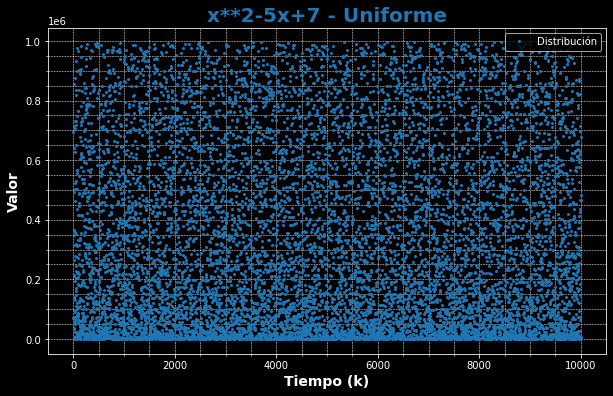

Media: 336759.6744
Mediana: 253513.0
Moda: 7.0
Media Geométrica: 133044.3575215499
Rango: 995006.0
Desviación Estándar: 300048.6657363498
Varianza: 90029201810.16379
Percentil 20: 40201.0
Cuartil 3: 570781.0
Asimetría: 0.6092758393462786
Coeficiente de Variación: 0.8909875158625875
Curtosis: -0.9200197157740111
Entropía: 6.854793642680505


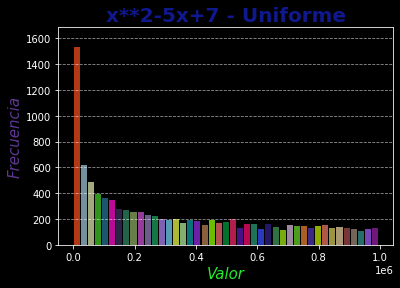

In [270]:
cuad_unif = aplicar_transf(rand_unif, "cuadratica")
escribir_array("cuadratica_unif.txt", cuad_unif)
graficar([i for i in range(1, len(cuad_unif)+1)], cuad_unif, "cuad_uniforme1.pdf", "x**2-5x+7 - Uniforme", "Tiempo (k)", "Valor")
u1 = DistribucionProbabilidad(cuad_unif)
u1.calcular_metricas(20, 3)
plotear_hist(cuad_unif, "x**2-5x+7 - Uniforme", "Valor", "Frecuencia",  "cuad_uniforme2.pdf", "rice")

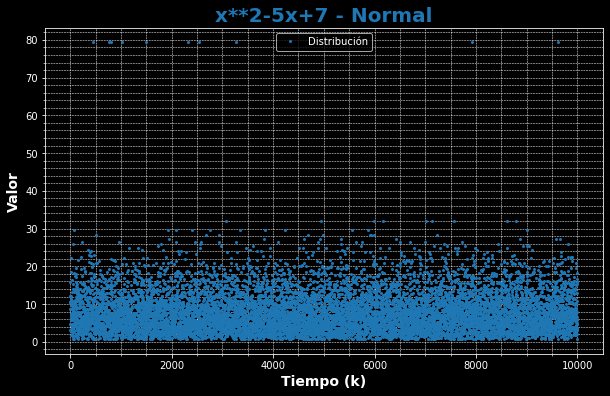

Media: 8.008649707650807
Mediana: 6.9499671269505185
Moda: 0.7500822667630311
Media Geométrica: 6.258708843603558
Rango: 78.56477737081079
Desviación Estándar: 5.648955167825946
Varianza: 31.91069448810746
Percentil 20: 3.4165709163423283
Cuartil 3: 10.807966950540425
Asimetría: 2.8027961723386756
Coeficiente de Variación: 0.7053567547634649
Curtosis: 25.364062767020968
Entropía: 6.859100114400464


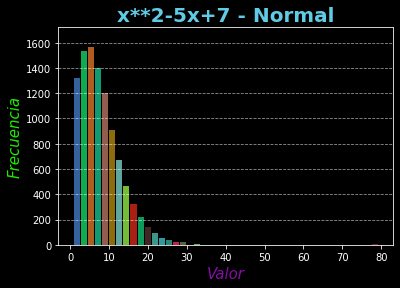

In [271]:
cuad_norm = aplicar_transf(rand_norm, "cuadratica")
escribir_array("cuadratica_norm.txt", cuad_norm)
graficar([i for i in range(1, len(cuad_norm)+1)], cuad_norm, "cuad_normal1.pdf",  "x**2-5x+7 - Normal", "Tiempo (k)", "Valor")
u2 = DistribucionProbabilidad(cuad_norm)
u2.calcular_metricas(20, 3)
plotear_hist(cuad_norm, "x**2-5x+7 - Normal", "Valor", "Frecuencia", "cuad_normal2.pdf", "rice")

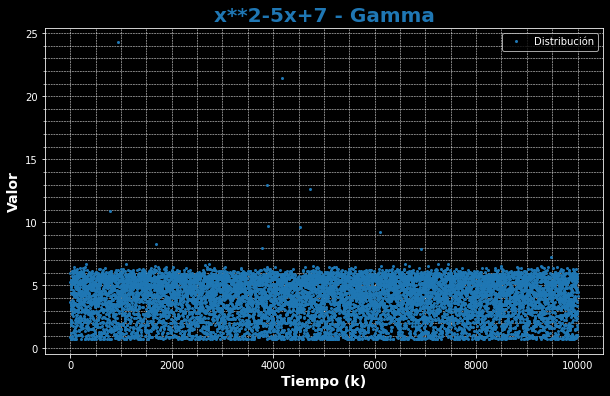

Media: 3.9053072113747587
Mediana: 4.177368575314183
Moda: 0.7500005744042504
Media Geométrica: 3.467203346495582
Rango: 23.518777964325086
Desviación Estándar: 1.5957158845266999
Varianza: 2.546309184130828
Percentil 20: 2.31866604855621
Cuartil 3: 5.236978835568335
Asimetría: -0.03371200541587822
Coeficiente de Variación: 0.4086018840922302
Curtosis: 3.331041401075372
Entropía: 9.21034037197618


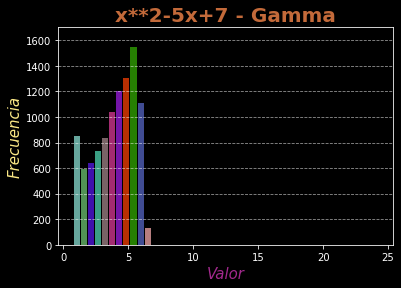

In [272]:
cuad_gamma = aplicar_transf(rand_gamma, "cuadratica")
escribir_array("cuadratica_gamma.txt", cuad_norm)
graficar([i for i in range(1, len(cuad_gamma)+1)], cuad_gamma, "cuad_gamma1.pdf", "x**2-5x+7 - Gamma", "Tiempo (k)", "Valor")
u3 = DistribucionProbabilidad(cuad_gamma)
u3.calcular_metricas(20, 3)
plotear_hist(cuad_gamma, "x**2-5x+7 - Gamma", "Valor", "Frecuencia", "cuad_gamma2.pdf", "rice")

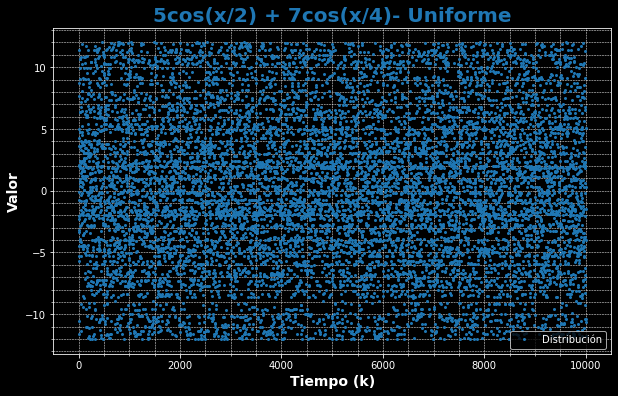

/home/rodrigo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


Media: 0.07500094721304476
Mediana: -0.1414125866542264
Moda: 2.0219426827710847
Media Geométrica: nan
Rango: 23.999599193264014
Desviación Estándar: 6.142673705819402
Varianza: 37.73244025616507
Percentil 20: -5.65388656326405
Cuartil 3: 4.714552886269873
Asimetría: 0.02803509669008664
Coeficiente de Variación: 81.90128170475985
Curtosis: -0.8046105401758425
Entropía: 6.859100114400464


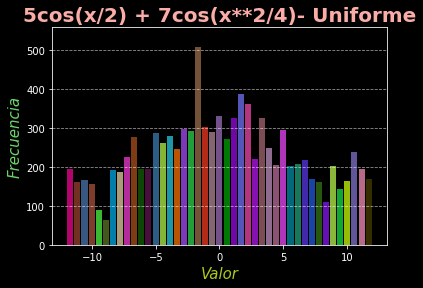

In [273]:
per_unif = aplicar_transf(rand_unif, "periodica")
escribir_array("periodica_unif.txt", per_unif)
graficar([i for i in range(1, len(per_unif)+1)], per_unif, "per_uniforme1.pdf", "5cos(x/2) + 7cos(x/4)- Uniforme", "Tiempo (k)", "Valor")
u4 = DistribucionProbabilidad(per_unif)
u4.calcular_metricas(20, 3)
plotear_hist(per_unif, "5cos(x/2) + 7cos(x**2/4)- Uniforme", "Valor", "Frecuencia", "per_uniforme2.pdf", "rice")

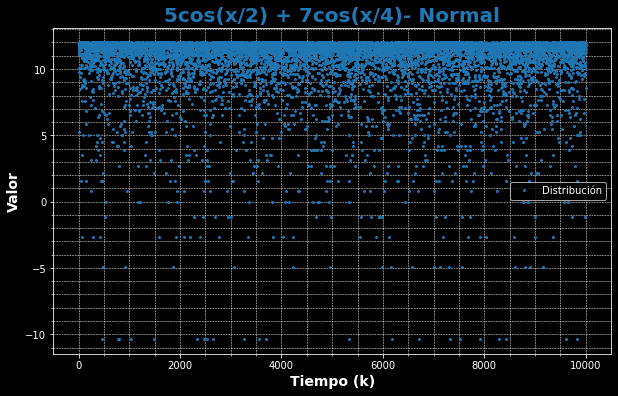

/home/rodrigo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


Media: 10.80876099582441
Mediana: 11.662547979128654
Moda: 6.52851985506493
Media Geométrica: nan
Rango: 22.35284649264491
Desviación Estándar: 2.3202687494927314
Varianza: 5.383647069872564
Percentil 20: 10.368290522859112
Cuartil 3: 11.928963288894458
Asimetría: -4.245310788638487
Coeficiente de Variación: 0.21466556161146375
Curtosis: 24.492974112275466
Entropía: 6.255222139775375


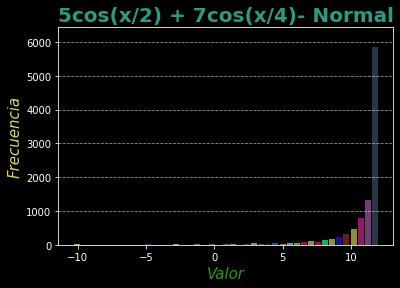

In [274]:
per_norm = aplicar_transf(rand_norm, "periodica")
escribir_array("periodica_norm.txt", per_norm)
graficar([i for i in range(1, len(per_norm)+1)], per_norm, "per_normal1.pdf", "5cos(x/2) + 7cos(x/4)- Normal", "Tiempo (k)", "Valor")
u5 = DistribucionProbabilidad(per_norm)
u5.calcular_metricas(20, 3)
plotear_hist(per_norm, "5cos(x/2) + 7cos(x/4)- Normal", "Valor", "Frecuencia", "per_normal2.pdf", "rice")

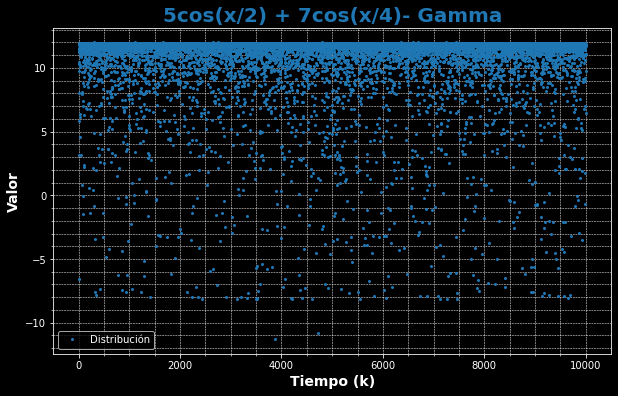

/home/rodrigo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


Media: 10.607614246685054
Mediana: 11.698548492318952
Moda: -11.277595214192258
Media Geométrica: nan
Rango: 23.27527002334957
Desviación Estándar: 3.01224951667851
Varianza: 9.073647150729917
Percentil 20: 10.46960977799247
Cuartil 3: 11.90385215472426
Asimetría: -3.809021305733184
Coeficiente de Variación: 0.28397049955128756
Curtosis: 16.05033484254258
Entropía: 9.21034037197618


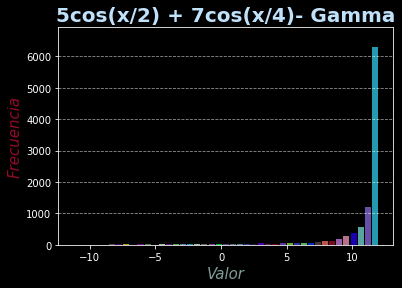

In [275]:
per_gamma = aplicar_transf(rand_gamma, "periodica")
escribir_array("periodica_gamma.txt", per_gamma)
graficar([i for i in range(1, len(per_gamma)+1)], per_gamma, "per_gamma1.pdf", "5cos(x/2) + 7cos(x/4)- Gamma", "Tiempo (k)", "Valor")
u6 = DistribucionProbabilidad(per_gamma)
u6.calcular_metricas(20, 3)
plotear_hist(per_gamma, "5cos(x/2) + 7cos(x/4)- Gamma", "Valor", "Frecuencia", "per_gamma2.pdf", "rice")